In [ ]:
#wind power production over a period of time
import pandas as pd
import numpy as np
import seaborn 
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('wind1.csv')

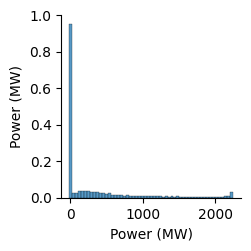

In [ ]:
seaborn.pairplot(df)

In [ ]:
print(df.head())

              D_T  Power (MW)
0  10/1/2021 0:40     -0.0265
1  10/1/2021 1:40     -0.3133
2  10/1/2021 2:40      0.0000
3  10/1/2021 3:40      0.0000
4  10/1/2021 4:40     -0.0103


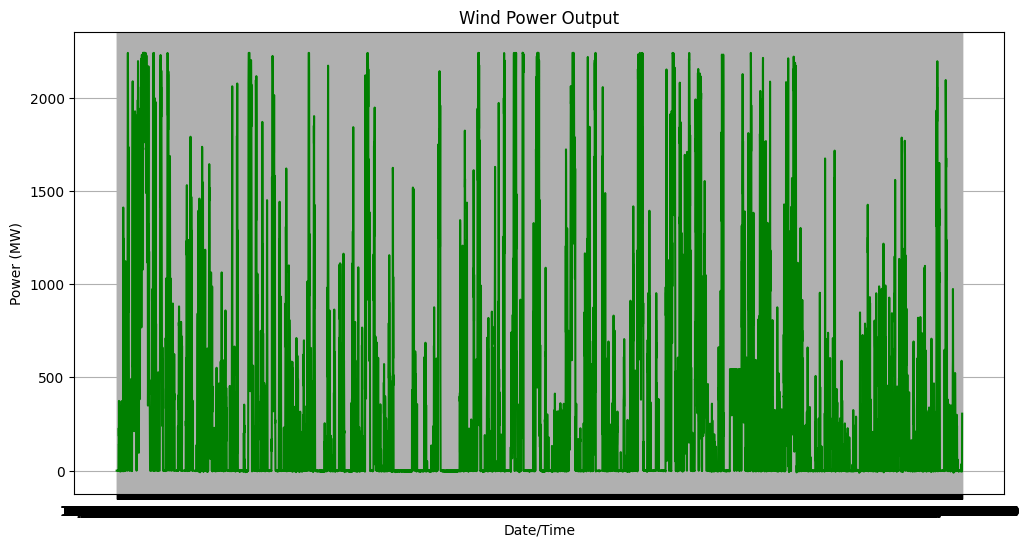

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['D_T'], df['Power (MW)'],color='green')
plt.title('Wind Power Output')
plt.xlabel('Date/Time')
plt.ylabel('Power (MW)')
plt.grid(True)
plt.show()

array([[<Axes: title={'center': 'Power (MW)'}>]], dtype=object)

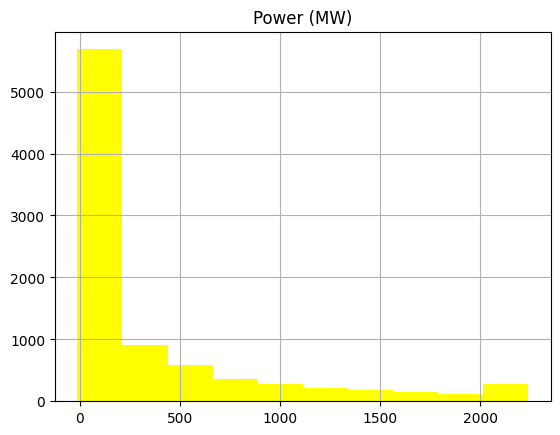

In [ ]:
df.hist(color='yellow')

In [ ]:
df['D_T'] = pd.to_datetime(df['D_T'])

# add separate columns for date and time
df['date'] = df['D_T'].dt.date
df['day'] = df['D_T'].dt.day_name()
df['year'] = df['D_T'].dt.year
df['time'] = df['D_T'].dt.time
df.drop('D_T', axis=1, inplace=True)
# print the updated dataframe
print(df)


      Power (MW)        date     day  year      time
0        -0.0265  2021-10-01  Friday  2021  00:40:00
1        -0.3133  2021-10-01  Friday  2021  01:40:00
2         0.0000  2021-10-01  Friday  2021  02:40:00
3         0.0000  2021-10-01  Friday  2021  03:40:00
4        -0.0103  2021-10-01  Friday  2021  04:40:00
...          ...         ...     ...   ...       ...
8755     -0.4030  2022-09-30  Friday  2022  19:40:00
8756      0.0000  2022-09-30  Friday  2022  20:40:00
8757      0.0000  2022-09-30  Friday  2022  21:40:00
8758     -4.5674  2022-09-30  Friday  2022  22:40:00
8759    305.4080  2022-09-30  Friday  2022  23:40:00

[8760 rows x 5 columns]


<Axes: xlabel='time', ylabel='date'>

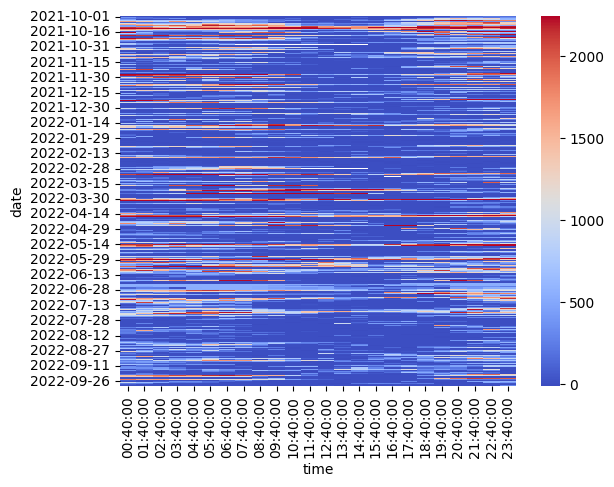

In [ ]:
pt = pd.pivot_table(df, values='Power (MW)', index='date', columns='time')

# Create a heatmap
seaborn.heatmap(pt, cmap='coolwarm')

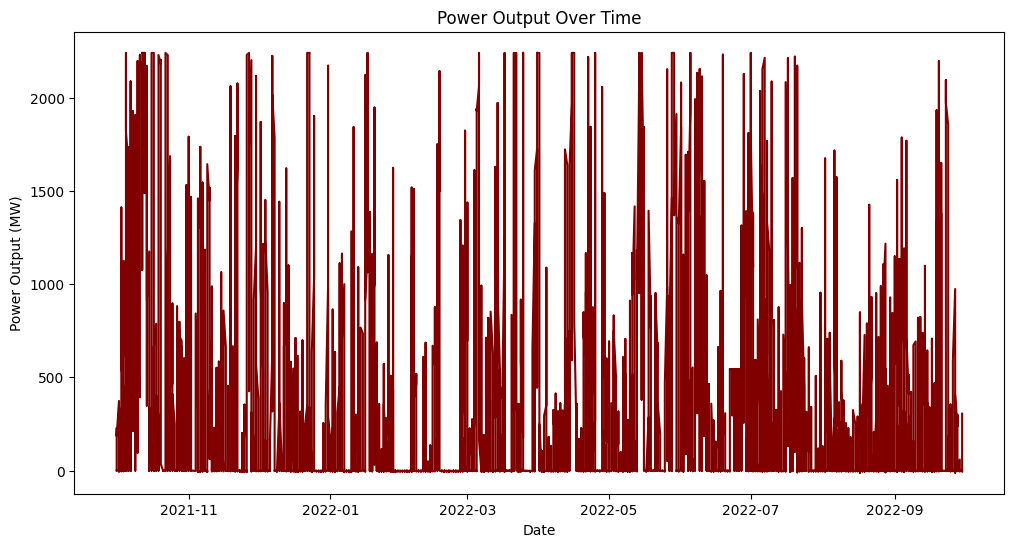

In [ ]:

%matplotlib inline

plt.figure(figsize=(12,6))

plt.plot(df['date'], df['Power (MW)'],color='maroon')

plt.title('Power Output Over Time')
plt.xlabel('Date')
plt.ylabel('Power Output (MW)')

plt.show()

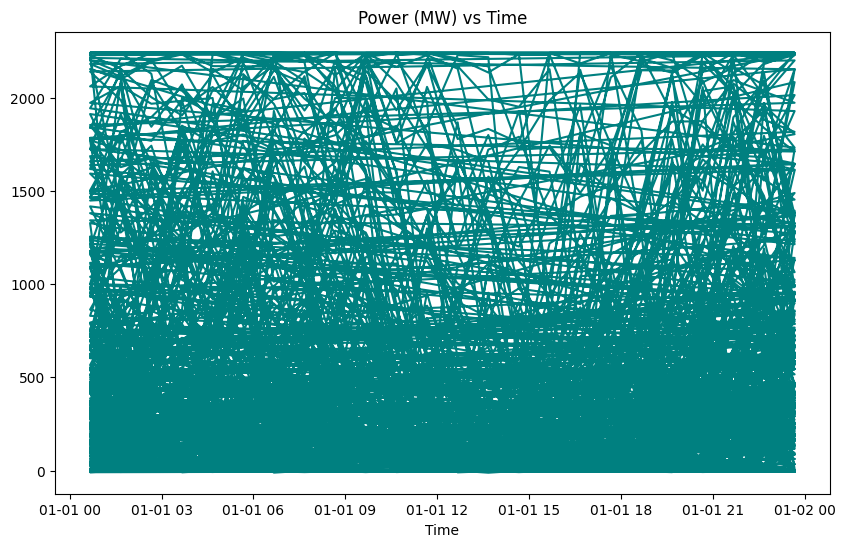

In [ ]:
import matplotlib.pyplot as plt

# Convert the time column to a datetime object
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# Set the figure size
plt.figure(figsize=(10,6))

# Plot the Richter line graph
plt.plot(df['time'], df['Power (MW)'],color='teal')

# Set the x-axis label and title
plt.xlabel('Time')
plt.title('Power (MW) vs Time')

# Show the plot
plt.show()


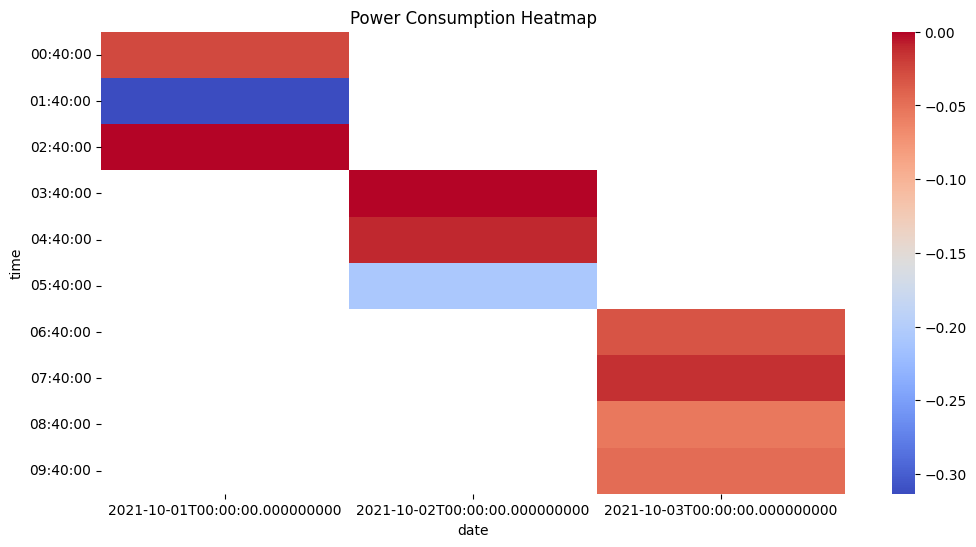

In [ ]:
# create dictionary from data
data = {
    'Power (MW)': [-0.0265, -0.3133, 0.0, 0.0, -0.0103, -0.2078, -0.0321, -0.0145, -0.0547, -0.0475],
    'date': ['2021-10-01', '2021-10-01', '2021-10-01', '2021-10-02', '2021-10-02', '2021-10-02', '2021-10-03', '2021-10-03', '2021-10-03', '2021-10-03'],
    'time': ['00:40:00', '01:40:00', '02:40:00', '03:40:00', '04:40:00', '05:40:00', '06:40:00', '07:40:00', '08:40:00', '09:40:00']
}

# convert dictionary to pandas dataframe
df = pd.DataFrame(data)

# set 'time' column as index
df.set_index('time', inplace=True)

# convert index to datetime object
df.index = pd.to_datetime(df.index)

# extract time from datetime object
df.index = df.index.strftime('%H:%M:%S')

# convert 'date' column to datetime object
df['date'] = pd.to_datetime(df['date'])

# create pivot table with the values being the Power (MW) column
heatmap_data = df.pivot_table(index=df.index, columns=df['date'], values='Power (MW)')

# plot the heatmap
plt.figure(figsize=(12,6))
seaborn.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Power Consumption Heatmap')
plt.show()


In [ ]:
print(df)

          Power (MW)       date
time                           
00:40:00     -0.0265 2021-10-01
01:40:00     -0.3133 2021-10-01
02:40:00      0.0000 2021-10-01
03:40:00      0.0000 2021-10-02
04:40:00     -0.0103 2021-10-02
05:40:00     -0.2078 2021-10-02
06:40:00     -0.0321 2021-10-03
07:40:00     -0.0145 2021-10-03
08:40:00     -0.0547 2021-10-03
09:40:00     -0.0475 2021-10-03


In [ ]:
df1=df[['Power (MW)']]
df1

,Power (MW)
time,
00:40:00,-0.0265
01:40:00,-0.3133
02:40:00,0.0000
03:40:00,0.0000
04:40:00,-0.0103
05:40:00,-0.2078
06:40:00,-0.0321
07:40:00,-0.0145
08:40:00,-0.0547


In [ ]:
df2=df[['Power (MW)']]
d=df2.to_numpy()
d

array([[-0.0265],
       [-0.3133],
       [ 0.    ],
       [ 0.    ],
       [-0.0103],
       [-0.2078],
       [-0.0321],
       [-0.0145],
       [-0.0547],
       [-0.0475]])

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import numpy as np

# Generate some random data
np.random.seed(0)
X = np.random.rand(100, 2)

# Create a KMeans instance with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the data to the KMeans model
kmeans.fit(X)

# Obtain the cluster labels for each data point
labels = kmeans.labels_

# Obtain the coordinates of the cluster centers
centers = kmeans.cluster_centers_

# Print the cluster labels and centers
print("Cluster Labels:")
print(labels)
print("\nCluster Centers:")
print(centers)

Cluster Labels:
[2 2 0 0 2 2 2 1 0 2 2 0 0 0 1 0 0 0 2 2 0 1 2 1 1 1 1 1 1 1 1 1 0 1 1 2 2
 1 1 1 0 0 1 1 2 0 0 1 1 1 1 2 0 2 0 0 1 2 2 2 2 2 0 0 1 2 0 2 2 2 2 0 2 0
 2 0 0 0 2 1 2 2 2 0 1 1 1 1 0 1 0 1 2 2 1 1 0 2 1 0]

Cluster Centers:
[[0.22477318 0.67757842]
 [0.53191784 0.17092862]
 [0.7591731  0.6383279 ]]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.5.3
numpy version: 1.22.4
seaborn version: 0.12.2


In [ ]:
dk = pd.read_csv('wind1(2).csv')

In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
X_numerics = dk[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

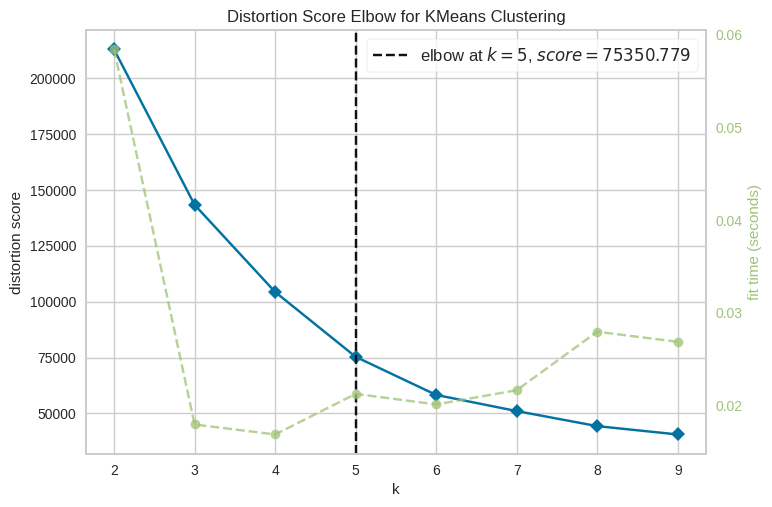

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

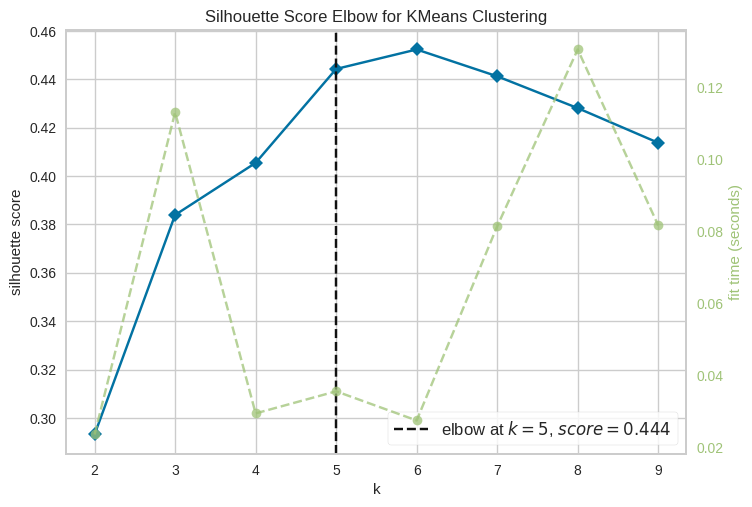

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [ ]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model
KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#accuracy
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(dk)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

    Accuracy score: 0.889903450

In [ ]:
from sklearn.cluster import DBSCAN
from itertools import product
eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

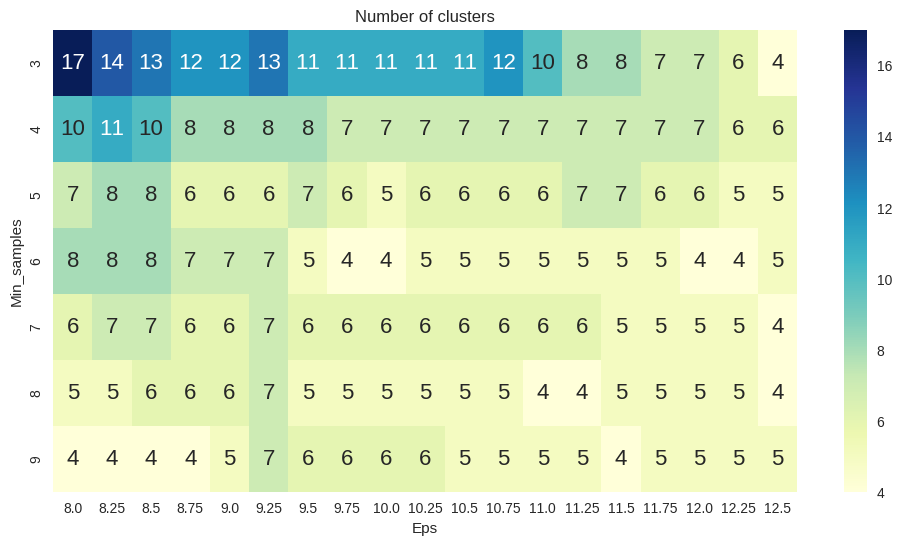

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

In [ ]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)
DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ 

In [ ]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


In [ ]:
#accuracy
correct_labels = sum(y == labels)
dbscan_dk=acc(y_test,y_pred)

    0.94329221920

In [ ]:
from sklearn.cluster import AffinityPropagation
no_of_clusters = []
preferences = range(-20000,-5000,100) # arbitraty chosen range
af_sil_score = [] # silouette scores
for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(X_numerics)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(X_numerics, AF.labels_))
af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


,preference,clusters,sil_score
82,-11800.0,6.0,0.451649
27,-17300.0,6.0,0.451491
51,-14900.0,6.0,0.451491
52,-14800.0,6.0,0.451440
28,-17200.0,6.0,0.451440


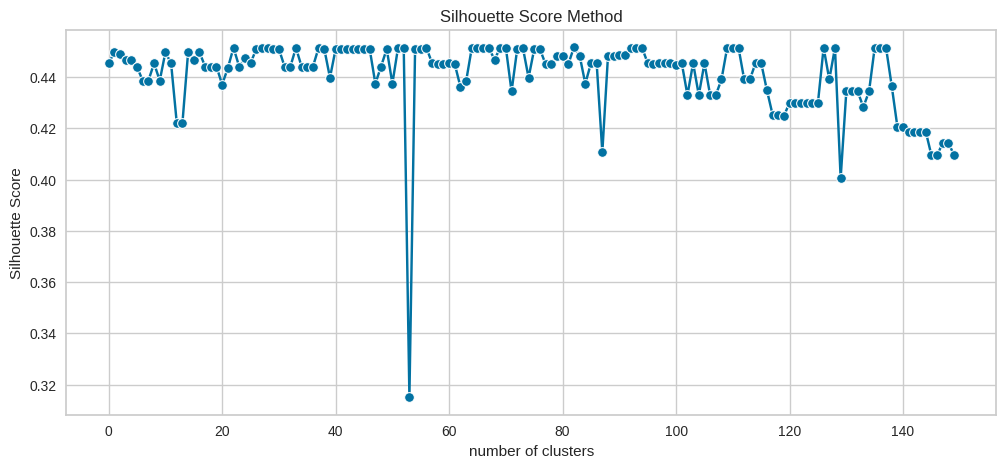

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(af_sil_score, marker='o',)
ax.set_title("Silhouette Score Method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [ ]:
AF = AffinityPropagation(preference=-11800).fit(X_numerics)
AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_ # append labels to points
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


In [ ]:
#accuracy
correct_labels = sum(y == labels)
acc=(y_test,y_pred)
dk=acc()

    0.57880144998

## Here we can conclude that DBSCAN clustering is more efficient than other two for predicting the wind energy production over a period of time!